# Diffusion MC

We will investigate the treatment of the Schroedinger equation as a diffusion equation with imaginary time.

See chapter 12.3 of https://compphys.quantumtinkerer.tudelft.nl/downloads/Thijssen_Chapter12_Quantum_Monte_Carlo.pdf for more details.

In [1]:
! swig -c++ -python swig/dmc.i
! python swig/setup_dmc.py build_ext --inplace

In [2]:
import sys
import os
sys.path.append( os.path.abspath("swig") )

In [3]:
import dmc
import numpy as np
import matplotlib.pyplot as plt

In [62]:
N_T = 1000 # Target number of walkers
dt = 0.01
timeSteps = 100000

### Run the simulation

In [63]:
rundmc = dmc.DiffusionMC(N_T, dt)

In [64]:
rundmc.run(timeSteps)

### Plot the results

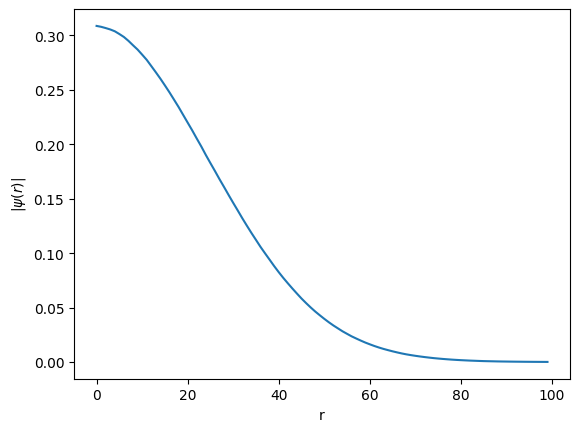

In [65]:
psi = rundmc.getPsi()
plt.plot(psi)
plt.xlabel("r")
plt.ylabel(r"$|\psi(r)|$")
plt.show()

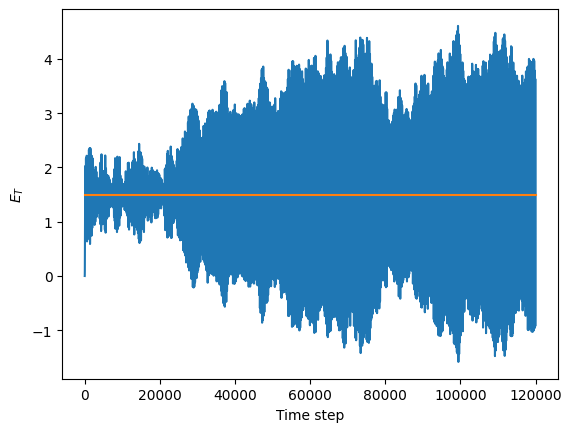

In [72]:
E_T_history = rundmc.getETHistory()
plt.plot(E_T_history)
# Add line at E=1.5
xx = np.linspace(0, len(E_T_history), 10)
yy = np.ones_like(xx)*1.5
plt.plot(xx, yy)
plt.xlabel("Time step")
plt.ylabel(r"$E_T$")
#plt.xlim(0, 20000)
plt.show()

In [74]:
# To do: investigate oscillations, plot psi versus time step
# To do: modify "alpha" parameter in E_T update step (note: have to restart kernel to update SWIG module)

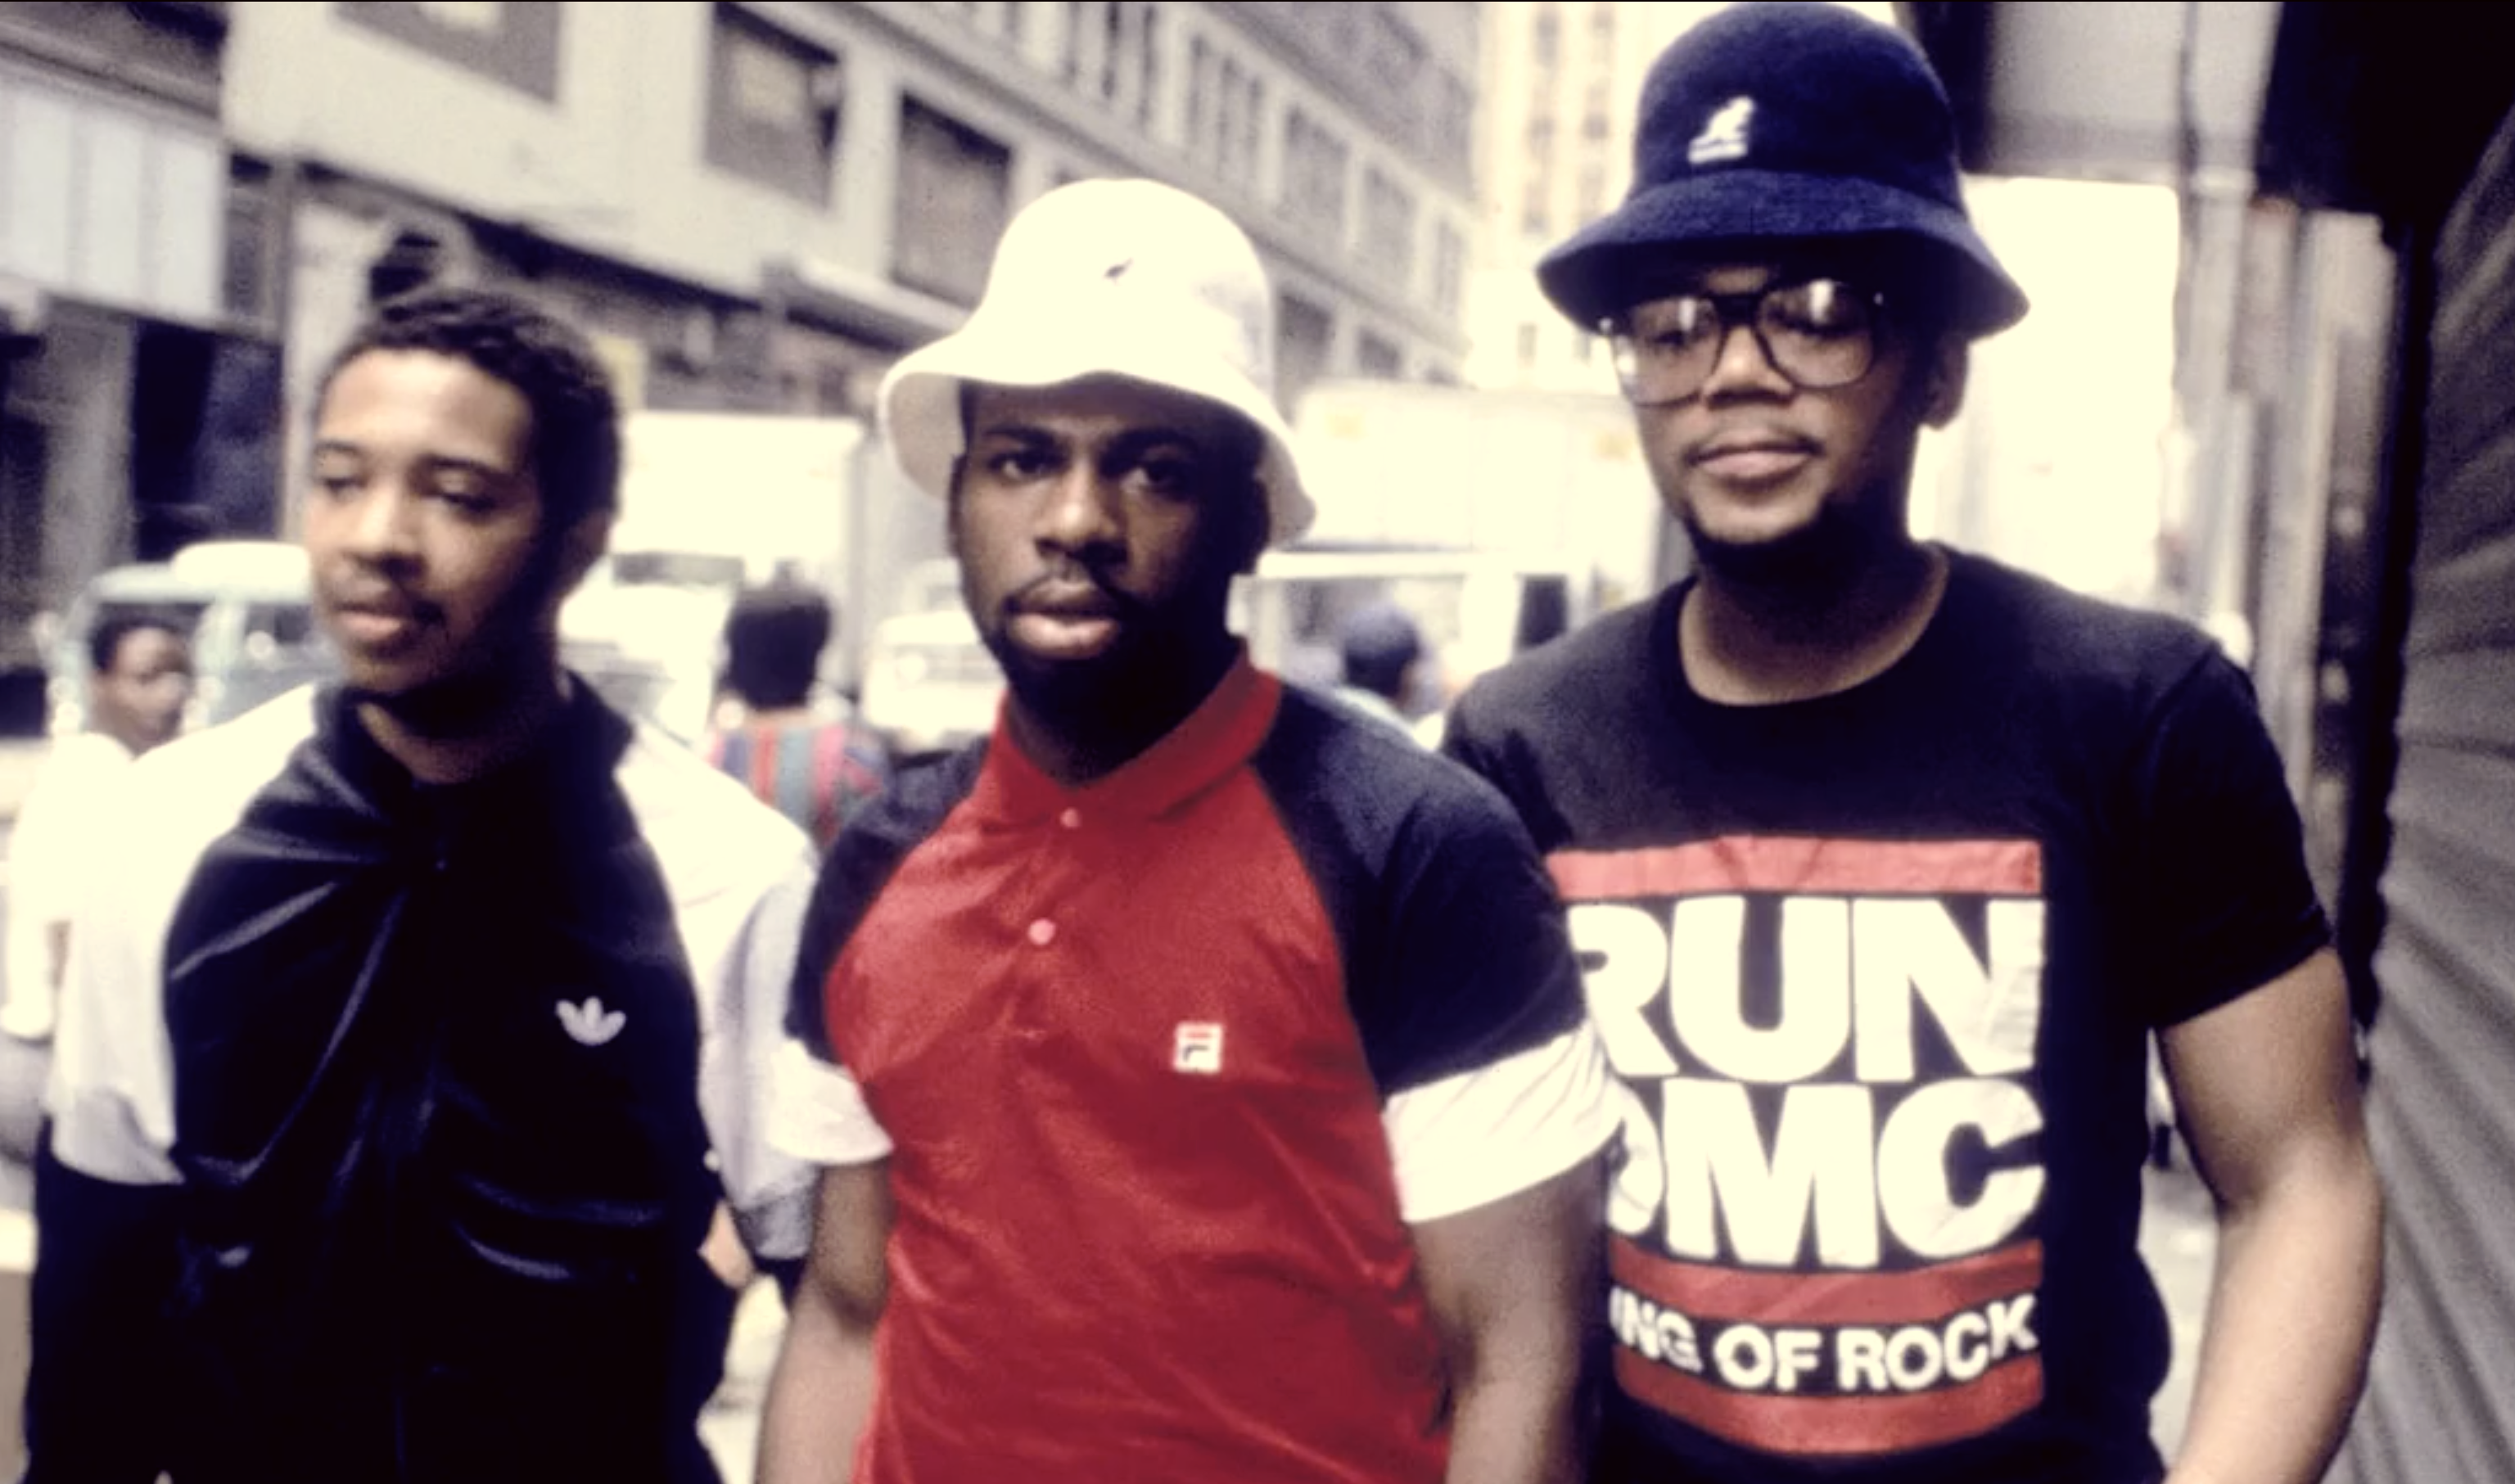